In [20]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = datasets.load_iris()
print("Iris dataset loaded successfully")

Iris dataset loaded successfully


In [4]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”)

In [5]:
data['Species']=iris['target']

In [6]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [7]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.isnull().any()

Petal length    False
Petal Width     False
Sepal Length    False
Sepal Width     False
Species         False
dtype: bool

In [9]:
data.dtypes

Petal length    float64
Petal Width     float64
Sepal Length    float64
Sepal Width     float64
Species          object
dtype: object

In [10]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Split data into train and test set

In [11]:
X = data[["Sepal Length","Sepal Width","Petal length","Petal Width"]].values
Y = data['Species'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=1)

### Train the decision tree classifier

In [12]:

DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

### Test the model trained on test set

In [13]:
DT.predict(X_test)
prediction = DT.predict(X_test)

In [14]:
prediction = DT.predict(X_test)
prediction

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

### Perform Evaluation on Test set

In [15]:

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



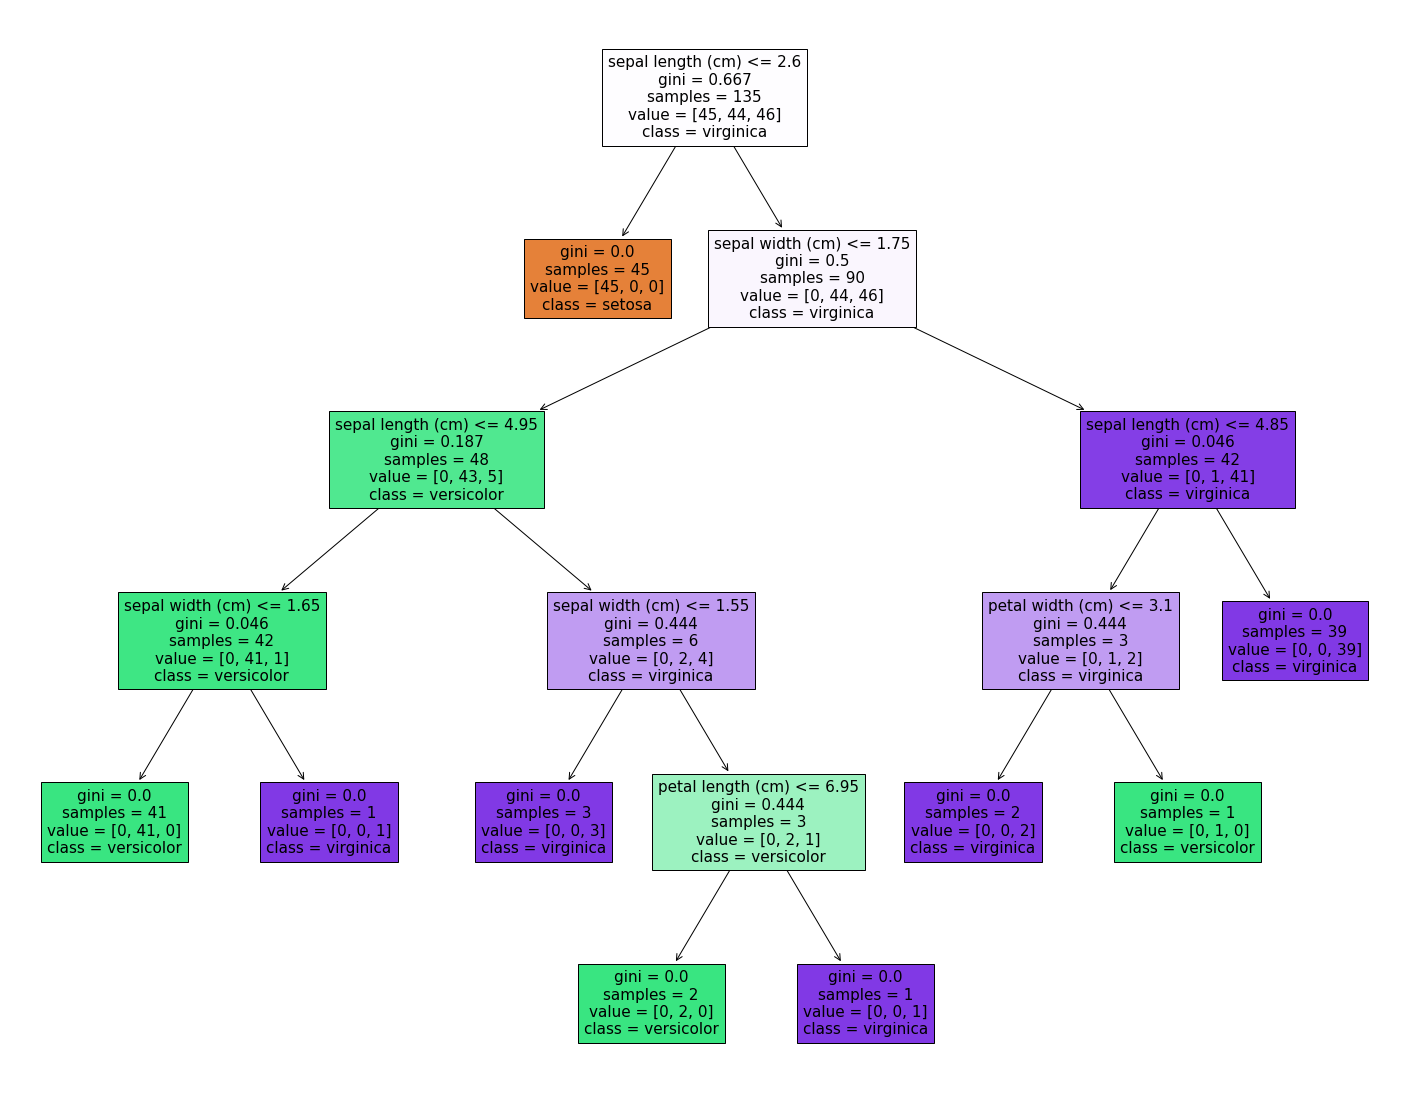

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
plt.show()

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.925
Accuracy: 1.0


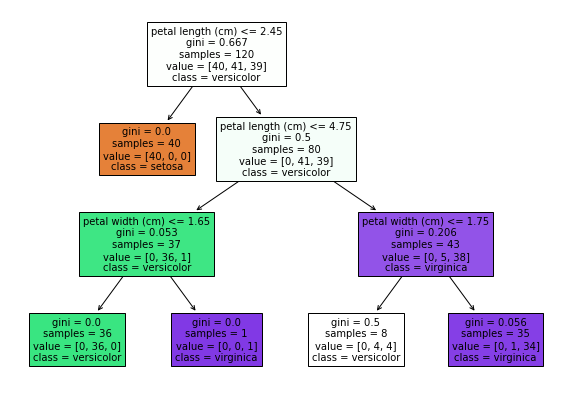

In [21]:


X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=kfold, scoring='accuracy')

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 7))
plot_tree(best_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()
